# Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

# Data

### Importing data

In [2]:
load_data = datasets.load_breast_cancer()

data = pd.DataFrame(load_data.data, columns=load_data.feature_names)

data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Standardizing the data

In [3]:
scaler = StandardScaler().fit_transform(data)

standardized_data = pd.DataFrame(scaler,columns=data.columns)

standardized_data['target'] = load_data.target

standardized_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


# Defining variables

In [4]:
X = standardized_data.drop('target', axis=1)

y = standardized_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Comparing models

### Creating Naive Bayes model

In [5]:
nb = GaussianNB()

nb.fit(X_train, y_train)

GaussianNB()

### Creating SVC model

In [6]:
svc = SVC(C=1, kernel='linear', probability=True)

svc.fit(X_train, y_train)

SVC(C=1, kernel='linear', probability=True)

### Defining probabilities

In [7]:
no_skill = [0 for _ in range(len(y_test))]

nb_probs = nb.predict_proba(X_test)

nb_probs = nb_probs[:, 1]

svc_probs = svc.predict_proba(X_test)

svc_probs = svc_probs[:, 1]

### Evaluating ROC AUC score

In [8]:
nb_auc = roc_auc_score(y_test, nb_probs)

svc_auc = roc_auc_score(y_test, svc_probs)

print('(Naive Bayes) ROC AUC score:', nb_auc)

print('(SVC) ROC AUC score:', svc_auc)

(Naive Bayes) ROC AUC score: 0.9884259259259259
(SVC) ROC AUC score: 0.9963624338624338


### Defining False Positive and True Positive rates

In [9]:
ns_fpr, ns_tpr, a =  roc_curve(y_test, no_skill)

nb_fpr, nb_tpr, a =  roc_curve(y_test, nb_probs)

svc_fpr, svc_tpr, a =  roc_curve(y_test, svc_probs)

### Comparing models with AUC

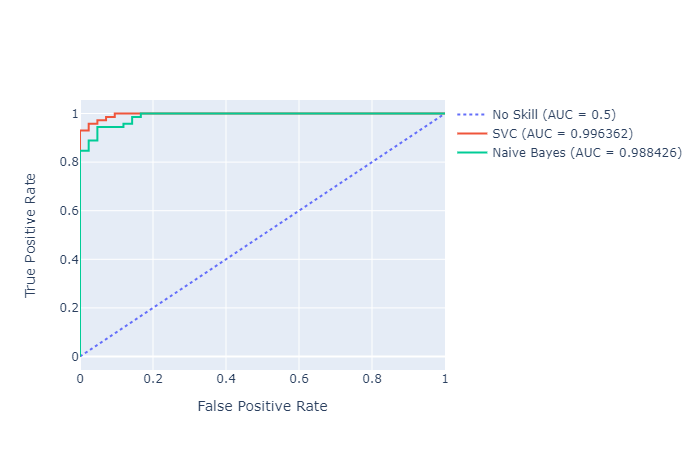

In [10]:
fig_auc = go.Figure()

fig_auc.add_trace(go.Scatter(x=ns_fpr, y=ns_tpr, mode='lines',line_dash='dot', 
                             name = 'No Skill (AUC = 0.5)'))

fig_auc.add_trace(go.Scatter(x=svc_fpr, y=svc_tpr, mode='lines', 
                             name=('SVC (AUC = %f)' %svc_auc)))

fig_auc.add_trace(go.Scatter(x=nb_fpr, y=nb_tpr, mode='lines', 
                             name=('Naive Bayes (AUC = %f)' %nb_auc)))

fig_auc.update_layout(xaxis_title = 'False Positive Rate', 
                      yaxis_title='True Positive Rate', 
                      width=700, height=500)

fig_auc.show('png')